In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import matplotlib as mpl
import seaborn as sns  
from scipy.stats import norm
from scipy.stats import ttest_ind
import statistics
from IPython.display import Image
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn import datasets
from MLE import *   # MLE classes for multivariant distribution
%matplotlib inline     
sns.set(color_codes=True)


Reading Data 
https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

The dataset has to two data
1. hour
2. day

the hour dataset does not have guassian distribution. though a number of columns from day dataset has guassian distribution. though the day dataset has rows

***
Many Number of datasets were tried and tested, most the dimensions were not gaussian. the 'day' dataset was selected because its distribution (alteast most of them) are guassian 

To change dataset, couple of changes must be met. 

1. load the dataset in the cell (3) below 
2. select the columns to be worked upon in cell number 8, at the moment we have taken only guassian based columns. 
3. change the target column name in the cell number 12 varible name 'target_value'


In [2]:
# df = pd.read_csv("dataset\housing.csv")
# from sklearn.datasets import fetch_california_housing
df = pd.read_csv("dataset\day.csv")
# california_housing = fetch_california_housing()
# df = pd.read_excel("dataset\Dry_Bean_Dataset.xlsx")
# data = datasets.load_breast_cancer()
# df = pd.DataFrame(data=data.data, columns=data.feature_names)



Identifying the dimensions that have guassian distribution.

here we have identified that below columns are on guassian distribution. the starting 8 columns are more ore less Uniform. and casual dimension is poison. we are removing these columns for this task. 

the rest of columns are on guassian incluing the target dimension of 'cnt'


Array of Guassian Distribution dimensions
[ 'temp', 'atemp', 'hum', 'windspeed', 'registered', 'cnt']



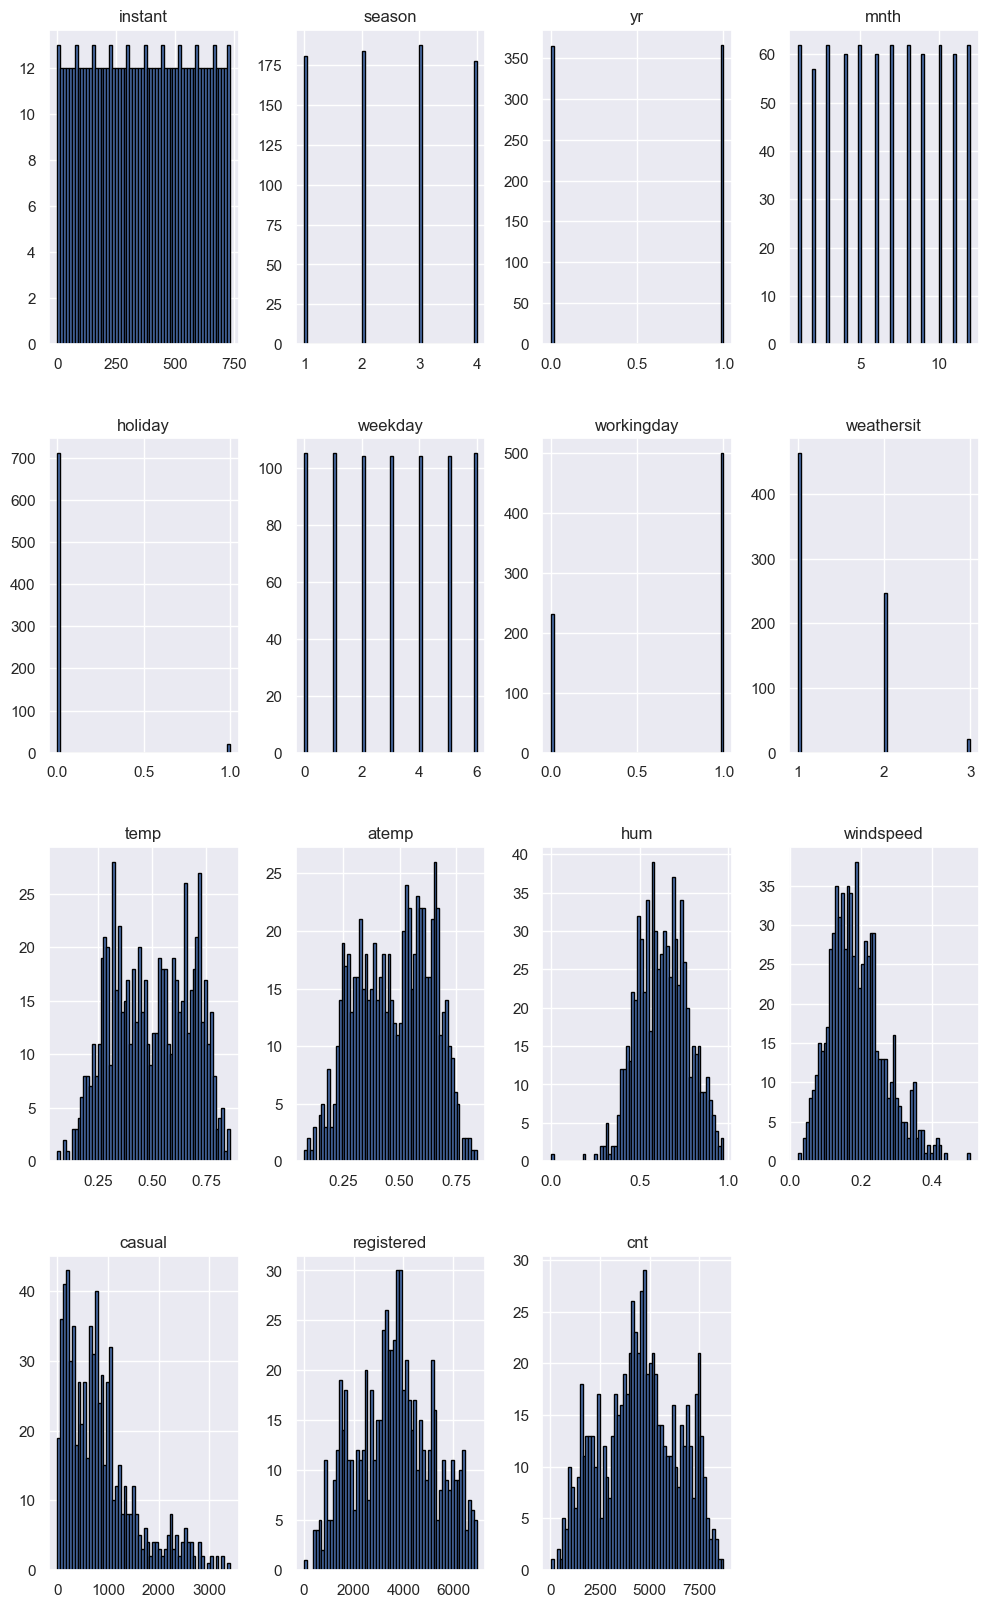

In [3]:
hist = df.hist(figsize=(12, 20), bins=60, edgecolor="black")

In [4]:
print(df.columns)
print(df.shape)


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
(731, 16)


In [5]:
gussain_columns =[ 'temp', 'atemp', 'hum', 'windspeed',
       'registered', 'cnt']
# gussain_columns =[ 'housing_median_age', 'total_rooms',
#        'total_bedrooms', 'population', 'households', 'median_income',
#        'median_house_value']

In [6]:
modified_df = df[gussain_columns]

In [7]:
target_value = ['cnt'] #['median_house_value']#
drop_columns = []
y = modified_df[target_value]
X = modified_df.drop(np.concatenate((target_value, drop_columns)),axis=1)
X

,temp,atemp,hum,windspeed,registered
0,0.34,0.36,0.81,0.16,654
1,0.36,0.35,0.70,0.25,670
2,0.20,0.19,0.44,0.25,1229
3,0.20,0.21,0.59,0.16,1454
4,0.23,0.23,0.44,0.19,1518
...,...,...,...,...,...
726,0.25,0.23,0.65,0.35,1867
727,0.25,0.26,0.59,0.16,2451
728,0.25,0.24,0.75,0.12,1182
729,0.26,0.23,0.48,0.35,1432


In [8]:
X.describe()

,temp,atemp,hum,windspeed,registered
count,731.00,731.00,731.00,731.00,731.00
mean,0.50,0.47,0.63,0.19,3656.17
std,0.18,0.16,0.14,0.08,1560.26
min,0.06,0.08,0.00,0.02,20.00
25%,0.34,0.34,0.52,0.13,2497.00
50%,0.50,0.49,0.63,0.18,3662.00
75%,0.66,0.61,0.73,0.23,4776.50
max,0.86,0.84,0.97,0.51,6946.00


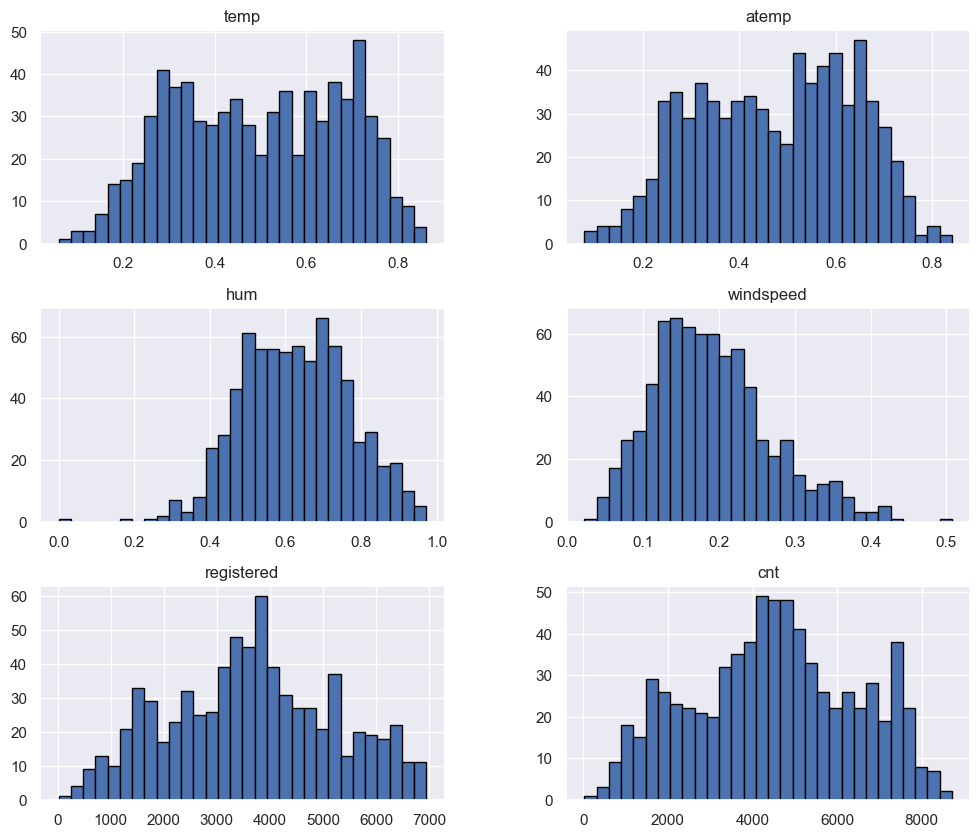

In [9]:
# modified_df = pd.concat([X,y], axis=1)
hist = modified_df.hist(figsize=(12, 10), bins=30, edgecolor="black")

Running ML Alogorithm on Orignal Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)


In [11]:
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric = None)

In [12]:
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 42/42 [00:19<00:00,  2.20it/s]

                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
RidgeCV                                      0.93       0.93  483.02   
LassoLars                                    0.93       0.93  484.56   
SGDRegressor                                 0.93       0.93  486.87   
Ridge                                        0.93       0.93  486.90   
BayesianRidge                                0.93       0.93  487.14   
LassoCV                                      0.93       0.93  487.23   
Lasso                                        0.93       0.93  487.39   
LarsCV                                       0.93       0.93  487.51   
LassoLarsCV                                  0.93       0.93  487.51   
LinearRegression                             0.93       0.93  487.51   
LassoLarsIC                                  0.93       0.93  487.51   
Lars                                         0.93       0.93  48

There are two methods of MLE tested in this activity. As there no standard tool available, following two custom classes were used for this activity


1. GuassianMLE - https://github.com/metjush/gaussianMLE
Alternate method to estimate MLE based on a Research paper 
http://www.sciencedirect.com/science/article/pii/0024379585900497

2. Multivariant Normal - https://www.youtube.com/watch?v=jAyTgkiaBbY
Normal - 	CSPythonForScience@gmail.com


1. Testing GuassianMLE method.

The original class is in MLE.py 

In [13]:
mod = GaussianMLE(modified_df.to_numpy())
mod.estimate()
# modn.fit(new_df)

Multivariate Gaussian distribution fit with MLE
The mean vector shape is:
(6,)
The variance-covariance matrix shape is:
(6, 6)


In [14]:
mean = np.nan_to_num(mod.mu.tolist())
sigma = np.nan_to_num(mod.sigma.tolist())

In [15]:
derived_x  = np.random.multivariate_normal(mean, sigma, size = modified_df.shape[0])
derived_df = pd.DataFrame(derived_x, columns=modified_df.columns)

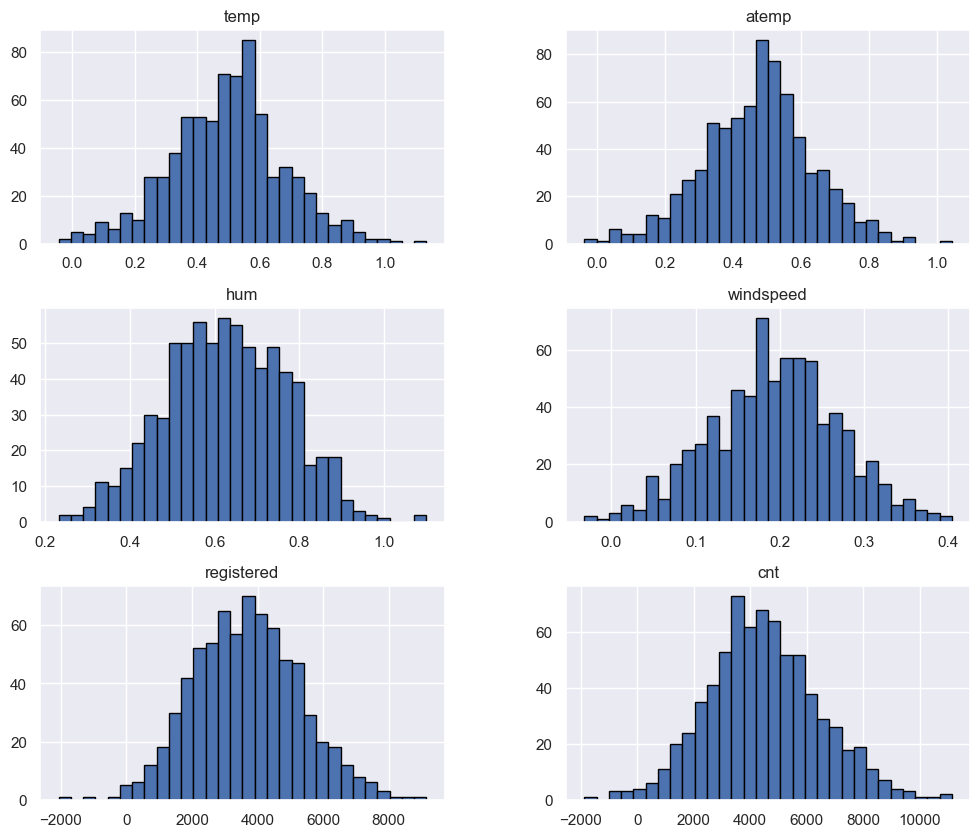

In [16]:
hist = derived_df.hist(figsize=(12, 10), bins=30, edgecolor="black")

In [17]:
X_derived = derived_df.drop(target_value, axis=1)
y_derived = derived_df[target_value]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_derived, y_derived, test_size=.2)

The prediction on new generate numbers closely match with the original prediction though the some additional models have gain added results. this may be due to outliers in the original dataset 

In [19]:
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:15<00:00,  2.79it/s]

                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
SGDRegressor                                 0.91       0.91  548.41   
LassoLars                                    0.91       0.91  548.56   
RidgeCV                                      0.91       0.91  548.57   
Ridge                                        0.91       0.91  548.57   
LassoCV                                      0.91       0.91  548.67   
LassoLarsCV                                  0.91       0.91  548.68   
Lasso                                        0.91       0.91  548.73   
LassoLarsIC                                  0.91       0.91  548.76   
OrthogonalMatchingPursuitCV                  0.91       0.91  548.80   
BayesianRidge                                0.91       0.91  549.02   
TransformedTargetRegressor                   0.91       0.91  549.48   
LinearRegression                             0.91       0.91  54

2. Testing MultivariantNormal method.

The original class is in MLE.py 

In [20]:
model1 = MultivariateNormal()
model1.fit(modified_df.to_numpy())


In [21]:
mean1 = np.nan_to_num(np.reshape(model1.u_,model1.u_.shape[0]))
sigma1 = np.nan_to_num(model1.sig_.tolist())

In [22]:
derived_x  = np.random.multivariate_normal(mean1, sigma1, size = modified_df.shape[0])
derived_df = pd.DataFrame(derived_x, columns=modified_df.columns)

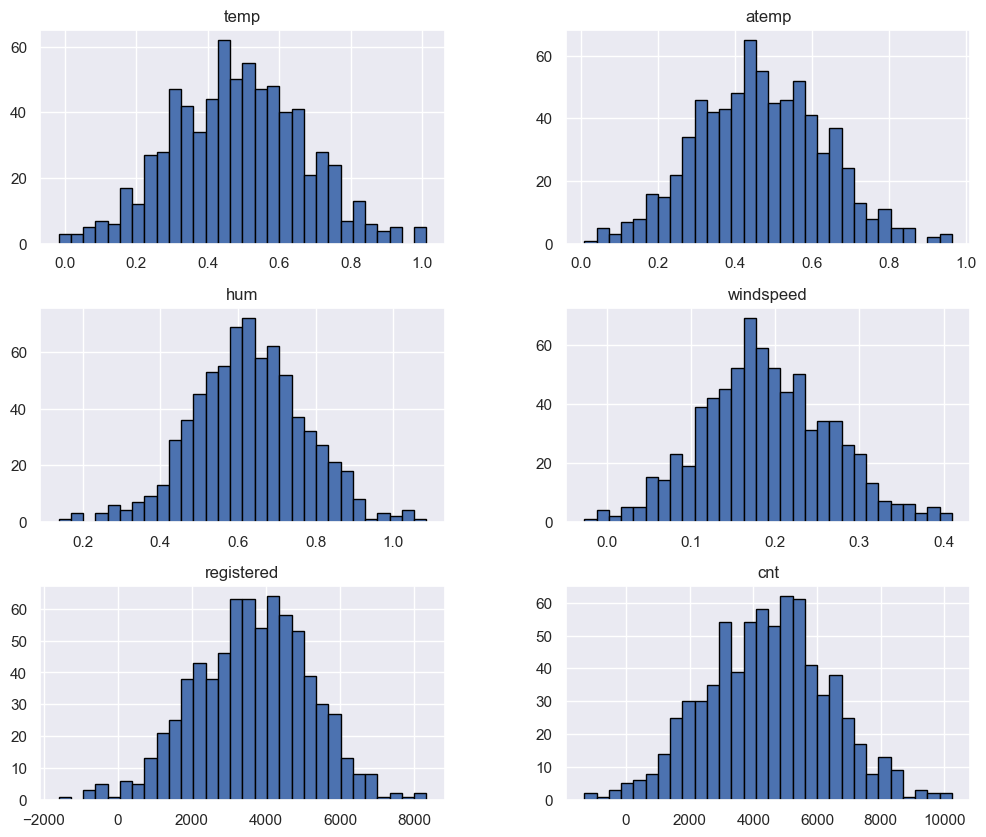

In [23]:
hist = derived_df.hist(figsize=(12, 10), bins=30, edgecolor="black")

In [24]:
X_derived = derived_df.drop(target_value, axis=1)
y_derived = derived_df[target_value]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_derived, y_derived, test_size=.2)

the prediction of second attempt also closely matches is the predictions of the original dataset. 

In [26]:
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:15<00:00,  2.78it/s]

                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
RANSACRegressor                              0.89       0.90  584.21   
PassiveAggressiveRegressor                   0.89       0.89  588.31   
SGDRegressor                                 0.89       0.89  589.57   
Lasso                                        0.89       0.89  590.33   
Lars                                         0.89       0.89  590.38   
LassoLarsIC                                  0.89       0.89  590.38   
LinearRegression                             0.89       0.89  590.38   
OrthogonalMatchingPursuitCV                  0.89       0.89  590.38   
TransformedTargetRegressor                   0.89       0.89  590.38   
LarsCV                                       0.89       0.89  590.40   
LassoLarsCV                                  0.89       0.89  590.40   
LassoCV                                      0.89       0.89  59